# CATBOOST

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__3.PREPROCESSING__

__4.CATBOOST__
             
__5.RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll utilize the CATBoost Regressor method.

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,196.0,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,182.4,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,170.4,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,187.4,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

In [7]:
X_train.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [8]:
X_test.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 4. CATBOOST

In [9]:
# Defining Grid for GridSearchCV

grid = {'subsample': [0.8, 0.9],
        'learning_rate':[0.01, 0.05, 0.1],
        'depth': [2,4,6], 
        'l2_leaf_reg': [1, 3, 5, 7], 
        'bagging_temperature': [0.0, 0.5, 1.0],
        'iterations': [25, 50, 75]}

In [10]:
# Instantiating GridSearchCV 

CATBoost_search = GridSearchCV(CatBoostRegressor(random_seed=126, verbose=False), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1 ,verbose = 1)

In [11]:
# Searching for the best parameters 

CV_CATBoost_results = CATBoost_search.fit(X_train, Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [12]:
# Displaying the best parameters 

CATBoost_Best_Parameters = pd.DataFrame(CV_CATBoost_results.best_params_,
                                        index = ['Best CATBoost Regression Parameters'])

CATBoost_Best_Parameters = CATBoost_Best_Parameters.transpose()
CATBoost_Best_Parameters

,Best CATBoost Regression Parameters
bagging_temperature,0.0
depth,6.0
iterations,75.0
l2_leaf_reg,3.0
learning_rate,0.1
subsample,0.9


In [13]:
# Storing the values of the best parameters

best_subsample = CV_CATBoost_results.best_params_['subsample']
best_learning_rate = CV_CATBoost_results.best_params_['learning_rate']
best_depth = CV_CATBoost_results.best_params_['depth']
best_l2_leaf_reg = CV_CATBoost_results.best_params_['l2_leaf_reg']
best_bagging_temperature = CV_CATBoost_results.best_params_['bagging_temperature']
best_iterations = CV_CATBoost_results.best_params_['iterations']


In [14]:
# Instantiating the best model
CATBoostModel = CatBoostRegressor(random_seed= 126, verbose=False,
                               subsample = best_subsample,
                                  learning_rate = best_learning_rate, 
                                  depth = best_depth,
                                  l2_leaf_reg = best_l2_leaf_reg, 
                                  bagging_temperature = best_bagging_temperature,
                                  iterations = best_iterations).fit(X_train, Y_train)

In [15]:
# Getting the R^2

CATB_R2 = np.round(CATBoostModel.score(X_train, Y_train),3)

In [16]:
# Getting predictions and training MSE 

CATBoostPredictions = CATBoostModel.predict(X_train)

CATBoost_Training_MSE = np.round(mean_squared_error(Y_train, CATBoostPredictions),2)

In [17]:
# Getting kfold MSE 

catboost_cv_MSE = round(np.mean(cross_val_score(CATBoostModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)


In [18]:
# Getting predictions and test MSE 

CATBOOST_predictions = CATBoostModel.predict(X_test)
CATBOOST_Test_MSE = round(mean_squared_error(Y_test, CATBOOST_predictions), 2)

In [19]:
# Dictionary that holds the performance metrics 

dict1 = {'CatBoost': (np.round(CATB_R2,3), CATBoost_Training_MSE,
                                            catboost_cv_MSE, CATBOOST_Test_MSE )}

In [20]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

## 5. RESULTS

__Aggragated Results__

In [21]:
# Displaying the metrics

Evaluation_df

,CatBoost
R^2,0.685
Training_MSE,228.040
Training_MSE (KFold),336.000
Test_MSE,280.970


__Residuals's Plots__

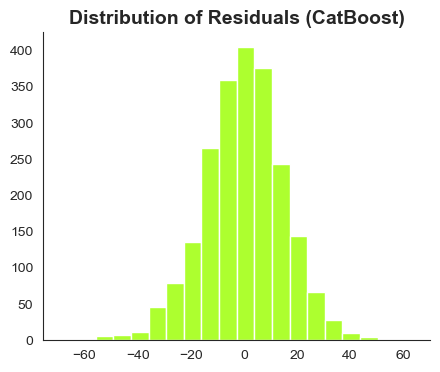

In [22]:
residuals_catboost = CATBoostPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_catboost, bins = 20, color = "greenyellow")
    
plt.title(label = "Distribution of Residuals (CatBoost)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

CatBoost demonstrates a balanced performance across the training, cross-validated, and test datasets, with training error levels comparable to those observed in cross-validation and test sets. Moreover, it consistently delivers highly accurate predictions.

__Saving the Results__

In [23]:
Evaluation_df.to_csv(r'CatBoost_Results.csv', index=True, 
                                              index_label= 'Metrics')